# Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import torch
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from transformers import QuestionAnsweringPipeline

sns.set_palette(palette='Paired')
sns.set_style('whitegrid')

In [2]:
# Albert
albert_tokenizer = AutoTokenizer.from_pretrained("Firat/albert-base-v2-finetuned-squad")
albert = AutoModelForQuestionAnswering.from_pretrained("Firat/albert-base-v2-finetuned-squad")

In [3]:
# Roberta
roberta_tokenizer = AutoTokenizer.from_pretrained("Firat/roberta-base-finetuned-squad")
roberta = AutoModelForQuestionAnswering.from_pretrained("Firat/roberta-base-finetuned-squad")

In [4]:
# Distilbert
distilbert_tokenizer = AutoTokenizer.from_pretrained("Firat/distilbert-base-uncased-finetuned-squad")
distilbert_tokenizer = AutoModelForQuestionAnswering.from_pretrained("Firat/distilbert-base-uncased-finetuned-squad")

In [5]:
# Load Questions
data = pd.read_excel('./questions_collection.xlsx')
data.columns = [col.lower() for col in data.columns]
data.head(2)

,id,topic,difficulty (1-3),text,question 1,answer 1,question 2,answer 2,question 3,answer 3
0,1.0,history,1.0,"World War II or the Second World War, often ab...",When took the second World War place?,1939 to 1945,How many personnel was involved?,more than 100 million,Who were the majority of fatalities?,civilians
1,2.0,health,3.0,Occupational therapy (OT) is a profession with...,Occupational therapy is profession within whic...,healthcare,By who is it performed?,occupational therapists and occupational thera...,What are common occupational therapy inerventi...,"helping children with disabilities, injury reh..."


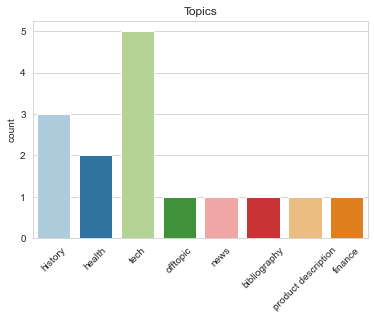

In [6]:
p = sns.countplot(x=data['topic'])
p.set_xticklabels(labels=p.get_xticklabels() , rotation=45)
p.set_xlabel('')
p.set_title('Topics')
plt.show()

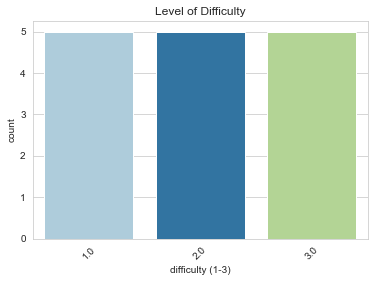

In [7]:
p = sns.countplot(x=data['difficulty (1-3)'])
p.set_xticklabels(labels=p.get_xticklabels() , rotation=45)
p.set_title('Level of Difficulty')
plt.show()

In [8]:
text = data.loc[0, 'text']
q1 = data.loc[0, 'question 1']
q2 = data.loc[0, 'question 2']
q3 = data.loc[0, 'question 3']
print(text)
print(40*'=')
print(q1)
print(40*'=')
print(q2)
print(40*'=')
print(q3)

World War II or the Second World War, often abbreviated as WWII or WW2, was a global war that lasted from 1939 to 1945. It involved the vast majority of the world's countries—including all of the great powers—forming two opposing military alliances: the Allies and the Axis powers. In a total war directly involving more than 100 million personnel from more than 30 countries, the major participants threw their entire economic, industrial, and scientific capabilities behind the war effort, blurring the distinction between civilian and military resources. Aircraft played a major role in the conflict, enabling the strategic bombing of population centres and the only two uses of nuclear weapons in war. World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities, a majority being civilians. Tens of millions of people died due to genocides (including the Holocaust), starvation, massacres, and disease. In the wake of the Axis defeat, Germany and J

In [9]:
foo = np.array(roberta_tokenizer(q1, padding='max_length')['input_ids'])
print(foo[foo != 1].shape)
print(len(q1.split(' ')))

(10,)
7


Jedes Wort bildet ein Token mit Start und End-Token. Es werden auch Satzzeichen tokenisiert.

In [10]:
inputs = roberta_tokenizer(text, padding="max_length", truncation=True)
print(inputs)

{'input_ids': [0, 10988, 1771, 3082, 50, 5, 4665, 623, 1771, 6, 747, 40993, 1070, 25, 29001, 50, 15584, 176, 6, 21, 10, 720, 997, 14, 9200, 31, 28234, 7, 21123, 4, 85, 963, 5, 4714, 1647, 9, 5, 232, 18, 749, 578, 8529, 70, 9, 5, 372, 4361, 578, 11847, 80, 9375, 831, 22484, 35, 5, 37761, 8, 5, 34073, 4361, 4, 96, 10, 746, 997, 2024, 3329, 55, 87, 727, 153, 3775, 31, 55, 87, 389, 749, 6, 5, 538, 3597, 4021, 49, 1445, 776, 6, 2683, 6, 8, 6441, 5587, 639, 5, 997, 1351, 6, 3089, 16715, 5, 16192, 227, 8233, 8, 831, 1915, 4, 25221, 702, 10, 538, 774, 11, 5, 3050, 6, 10298, 5, 3461, 10183, 9, 1956, 7872, 8, 5, 129, 80, 2939, 9, 1748, 2398, 11, 997, 4, 623, 1771, 3082, 21, 30, 444, 5, 16751, 3050, 11, 1050, 750, 131, 24, 4596, 11, 1510, 7, 5663, 153, 16982, 6, 10, 1647, 145, 6321, 4, 29031, 9, 2535, 9, 82, 962, 528, 7, 12358, 1975, 4376, 36, 8529, 5, 13903, 238, 31536, 6, 39246, 6, 8, 2199, 4, 96, 5, 3874, 9, 5, 34073, 3002, 6, 1600, 8, 1429, 58, 9533, 6, 8, 997, 3474, 28406, 879, 1536, 58, 296

Das Dictionary besteht aus den encodeten ID's und aus den Attention Mask. Die Attention Mask bezieht sich eigentlich nur auf den Wortteil, welcher nicht gepadded wurde. Das Padding wurde beim Tokenizer  mit dem Token 1 implementiert..

In [11]:
print([(i, roberta_tokenizer.convert_ids_to_tokens(i)) for i in range(4)])

[(0, '<s>'), (1, '<pad>'), (2, '</s>'), (3, '<unk>')]


Die oberen Token stellen besondere Token dar wie start_token als 1, pad_token als 1, 2 als end_token und einen unbekannten Token mit der ID 3.

In [12]:
att = np.array(inputs['attention_mask'])
att

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
# Extraction of topk: topk=10
roberta_pipeline = QuestionAnsweringPipeline(model=roberta, tokenizer=roberta_tokenizer)

In [14]:
text_id = 3
print(data.loc[text_id, 'question 1'])
print(roberta_pipeline(question=data.loc[text_id, 'question 1'], context=data.loc[text_id, 'text']))
print(data.loc[text_id, 'answer 1'])

On who focuses the series?
{'score': 0.9776242971420288, 'start': 22, 'end': 37, 'answer': 'Monkey D. Luffy'}
Monkey D. Ruffy


In [15]:
class QAEvaluate(object):
    """
    To-DO:
    --------
    - Implement Exact Match w. Predictions and Answers
    - Implement F1 Matching
    - Custom Implementation for matching like Levenstein distance ...
    
    - Implement plotting functions to plot results
    
    - Make CrossEval class to evaluate between different models
    """
    
    
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
        self.pipeline = QuestionAnsweringPipeline(model=model, 
                                                  tokenizer=tokenizer)
        self.metric = None
        
    def evaluate(self, texts: list, questions: list, answers: list):
        answers = {}
        with tqdm(total=len(texts)*len(questions[0])) as pbar:
            for i, text in enumerate(texts):
                answers[i] = {}
                for j, question in enumerate(questions[i]):
                    answer = self.answer_question(question=question, text=text)
                    answers[i][j] = answer
                    pbar.update(1)

        return answers
    
    def answer_question(self, question, text):
        answer = self.pipeline(question=question, context=text)
        
        return dict(question=question, answer=answer['answer'])

In [16]:
evaluator = QAEvaluate(model=roberta, tokenizer=roberta_tokenizer)

In [17]:
data.loc[0, 'question 1']

'When took the second World War place?'

In [18]:
evaluator.answer_question(question=data.loc[0, 'question 1'], text=data.loc[0, 'text'])

{'question': 'When took the second World War place?', 'answer': '1945'}

In [19]:
texts = data.loc[:2, 'text'].to_list()
questions = data.loc[:2, ['question 1', 'question 2', 'question 3']].to_numpy()
answers = data.loc[:2, ['answer 1', 'answer 2', 'answer 3']].to_numpy()

In [20]:
questions[0]

array(['When took the second World War place?',
       'How many personnel was involved?',
       'Who were the majority of fatalities?'], dtype=object)

In [21]:
texts[0]

"World War II or the Second World War, often abbreviated as WWII or WW2, was a global war that lasted from 1939 to 1945. It involved the vast majority of the world's countries—including all of the great powers—forming two opposing military alliances: the Allies and the Axis powers. In a total war directly involving more than 100 million personnel from more than 30 countries, the major participants threw their entire economic, industrial, and scientific capabilities behind the war effort, blurring the distinction between civilian and military resources. Aircraft played a major role in the conflict, enabling the strategic bombing of population centres and the only two uses of nuclear weapons in war. World War II was by far the deadliest conflict in human history; it resulted in 70 to 85 million fatalities, a majority being civilians. Tens of millions of people died due to genocides (including the Holocaust), starvation, massacres, and disease. In the wake of the Axis defeat, Germany and 

In [22]:
evaluator.evaluate(texts=texts, questions=questions,answers=answers)

  0%|          | 0/9 [00:00<?, ?it/s]

{0: {0: {'question': 'When took the second World War place?',
   'answer': '1945'},
  1: {'question': 'How many personnel was involved?',
   'answer': 'more than 100 million'},
  2: {'question': 'Who were the majority of fatalities?',
   'answer': 'civilians'}},
 1: {0: {'question': 'Occupational therapy is profession within which field?',
   'answer': 'healthcare'},
  1: {'question': 'By who is it performed?',
   'answer': 'occupational therapists and occupational therapy assistants (OTA).'},
  2: {'question': 'What are common occupational therapy inerventions?',
   'answer': 'helping children with disabilities to participate fully in school and social situations'}},
 2: {0: {'question': 'What can a raw input may be?',
   'answer': 'a matrix of pixels'},
  1: {'question': 'What does the second layer?',
   'answer': 'compose and encode arrangements of edges'},
  2: {'question': 'What network is it about?', 'answer': 'deep learning'}}}